# Logicle Scale

In this norebook we introduce the logicle scale and show how it can be applied.

### 1) What is the logicle scale?

The logicle scale was introduced in 2006 by Parks and Moore in their paper "A new "Logicle" display method avoids deceptive effects of logarithmic scaling for low signals and compensated data" and it is used for describing cytometry data. In 2012 they updated the logicle scale in the paper "Update for the Logicle Data Scale Including Operational Code Implementations". The logicle scale is linear around 0 and devolves than smoothly in a logarithmic function for increasing parameter values. Moreover, the interval is transformed to the unit intervall [0,1].

To make the logicle scale also applicable to parameter estimation we coded a wrapper around the original implementation. However, it is also possible to use the original way to define the logicle scale (see the end of this notebook).

The logicle scale has two input parameters:

- T: T defines the top of the scale, this means T is transformed to 1. T should be your upper parameter bound.

- end_lin: end_lin defines the rough linear end of your parameter space. The optimization performance depence strongly on the right choice of end_lin. A good first guess might be end_lin=1e-5.

### 2) How to use the logicle scale

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '/Users/lukas.spoegler/PycharmProjects/logicle_scale')

from LogicleScale import logicleTransform, \
                         logicleInverseTransform, \
                         logicleGradient, \
                         logicleInverseGradient


In [3]:
# define your parameter space
par = np.linspace(0,1e3,10**7)

In [4]:
# define the two input parameters
T = max(par)
end_lin = 1e-1

In [5]:
# transform your parameters
par_logicle = logicleTransform(par=par, T=T, end_lin=end_lin)

The ouput is a 2d array. The first input (par_logicle[0]) is the transformed logicle parameter. The second input (par_logicle[1]) is a logicle object, which contains all parameter T, W, M, A, end_lin and which are used for the transformation. This becomes usefull when you need to backtransform your data. However, such an logicle object can also be achived by:

In [16]:
logicle_object = LogicleScale.LogicleObject(T=T, end_lin=end_lin)

print('T = ', logicle_object.get_T)
print('W = ', logicle_object.get_W())
print('M = ', logicle_object.get_M())
print('A = ', logicle_object.get_A())
print('end lin = ', logicle_object.get_end_lin())

T =  1000.0
W =  0.5
M =  5.126417242364646
A =  -0.5
end lin =  0.1


linear until:  0.1000026753219758


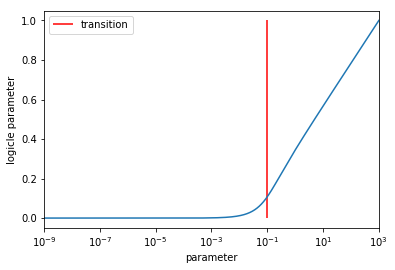

In [21]:
# visualize

# the transition indicates the point where the logicle scale goes from linear to logarithmic
W = par_logicle[1].get_W()
M = par_logicle[1].get_M()
transition_point = np.array([W/(M-W)])

transition = logicleInverseTransform(transition_point, par_logicle[1])

# this value should be the same as we defined in end_lin
print('linear until: ', transition[0])

plt.plot(par, par_logicle[0])
plt.vlines(transition, 0, 1, color='red', label='transition')
plt.xlabel("parameter")
plt.ylabel("logicle parameter")
plt.xscale('log')
plt.xlim(1e-9,1e3)
plt.legend()
plt.show()

Try with another endpoint of the linear range:

linear until:  0.0010000001029223673


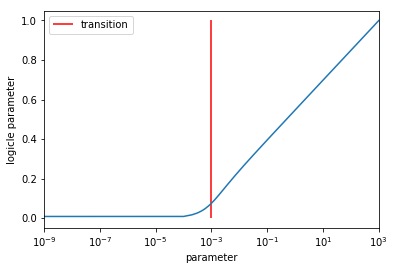

In [23]:
# change the parameter
end_lin = 1e-3

# transform your data
par_logicle = logicleTransform(par=par, T=T, end_lin=end_lin)

# the transition calculates the point where the logicle scale goes from linear to logarithmic
W = par_logicle[1].get_W()
M = par_logicle[1].get_M()
transition_point = np.array([W/(M-W)])

transition = logicleInverseTransform(transition_point, par_logicle[1])

# this value should be the same as defined in start_log
print('linear until: ', transition[0])

# display the logicle data
plt.plot(par, par_logicle[0])
plt.vlines(transition, 0, 1, color='red', label='transition')
plt.xlabel("parameter")
plt.ylabel("logicle parameter")
plt.xscale('log')
plt.xlim(1e-9,1e3)
plt.legend()
plt.show()

### Compute the inverse of the logicle scale

In [9]:
# compute the inverse
inv_par_logicle = logicleInverseTransform(par=par_logicle[0], logicle_object=par_logicle[1])

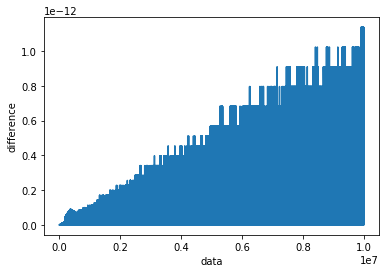

In [10]:
# we should get our data from the start again
# plot the difference of the transformed and backtransformed data and the start data

# difference between original data and back transformed data
diff = np.abs(inv_par_logicle - par)

plt.plot(diff)
plt.xlabel('parameter')
plt.ylabel('difference')
plt.show()

### Compute the gradient of the logicle scale

The gradient gets computet with center finite differences with stepsize equal to 1e-5

In [11]:
# compute gradient
logicle_gradient = logicleGradient(par, par_logicle[1])

84.35999806387858


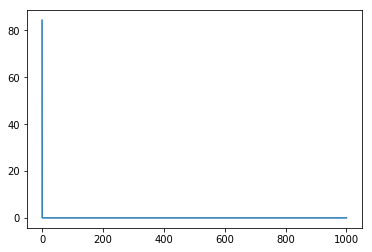

In [12]:
print(logicle_gradient[0])

# display logicle gradient
plt.plot(parameter, logicle_gradient)
plt.show()

Remark: The gradient resembles 1/x which is the gradient of log(x), which makes totally sense. But in contrast, the gradient of the logicle scale is well defined for 0.

### Compute the inverse gradient of the logicle scale

The inverse gradient can be calculated analytical.

In [24]:
# compute inverse gradient
logicle__inv_gradient = logicleInverseGradient(par, par_logicle[1])

### *Additional information

The original definition of the logicle scale has 4 input parameters:

- T: Top of the scale
- W: W defines the width of the linear range in $\log_{10}$ decades. If negative data is given it can be estimated from the data. 
- M: M defines the width of the log portion of the display in $\log_{10}$ decades.
- A: A defines the additional decades of negative data values.

    
So its also possible to transform your data with:

In [25]:
par_logicle = logicleTransform(par=par, T=1000, W=0.5, M=4.5, A=0.0)